In [1]:
import matplotlib.image as mpimg

170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
1563/1563 [==============================] - 181s 113ms/step - loss: 0.3504 - accuracy: 0.8429 - val_loss: 0.2777 - val_accuracy: 0.8796
Epoch 2/10
1563/1563 [==============================] - 157s 101ms/step - loss: 0.2733 - accuracy: 0.8869 - val_loss: 0.2398 - val_accuracy: 0.8992
Epoch 3/10
1563/1563 [==============================] - 153s 98ms/step - loss: 0.2335 - accuracy: 0.9042 - val_loss: 0.2286 - val_accuracy: 0.9050
Epoch 4/10
1563/1563 [==============================] - 156s 100ms/step - loss: 0.2080 - accuracy: 0.9173 - val_loss: 0.2171 - val_accuracy: 0.9122
Epoch 5/10
1563/1563 [==============================] - 146s 93ms/step - loss: 0.1874 - accuracy: 0.9262 - val_loss: 0.2500 - val_accuracy: 0.9097
Epoch 6/10
1563/1563 [==============================] - 155s 99ms/step - loss: 0.1660 - accuracy: 0.9344 - val_loss: 0.2154 - val_accuracy: 0.9110
Epoch 7/10
1563/1563 [==========================

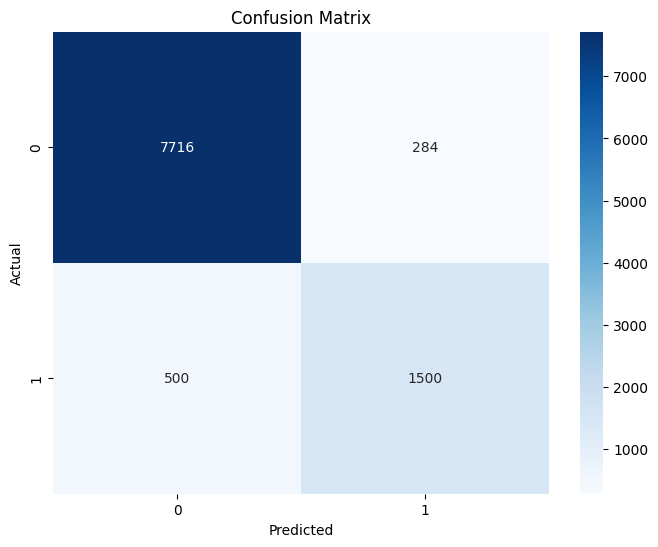

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Combine classes into two categories
def categorize_labels(labels):
    return np.where(np.isin(labels, [0, 1]), 1, 0)

y_train_cat = categorize_labels(y_train)
y_test_cat = categorize_labels(y_test)

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # Additional Dense layer
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_cat, epochs=10,
                    validation_data=(x_test, y_test_cat))

# Evaluate the model
y_pred = (model.predict(x_test) > 0.5).astype("int32")
precision = precision_score(y_test_cat, y_pred)
recall = recall_score(y_test_cat, y_pred)
f1 = f1_score(y_test_cat, y_pred)
accuracy = model.evaluate(x_test, y_test_cat, verbose=0)[1]

# Print metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

# Confusion matrix
cm = confusion_matrix(y_test_cat, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [3]:
# i tried the function for 20 epoch and it gave bad results
#so i opted for 10
def plot_loss(history):

    plt.figure()
    plt.title('Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Train', 'Validation'])
    plt.show()

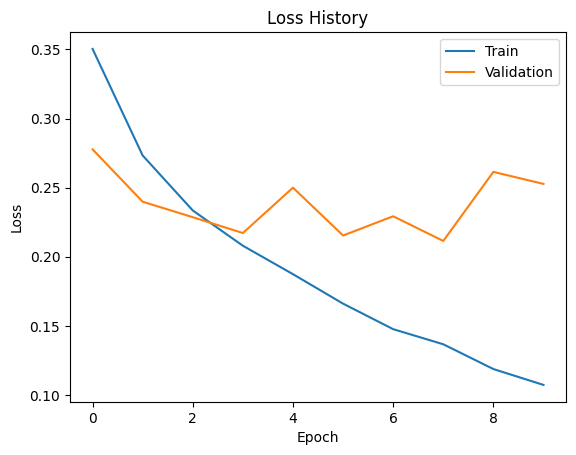

In [4]:
plot_loss(history)

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Function to preprocess and predict a single image
def predict_image(img_path, model):
        # Re-importing image within the function scope
        from tensorflow.keras.preprocessing import image
        img = image.load_img(img_path, target_size=(32, 32))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Expand dimensions and normalize
        prediction = model.predict(img_array)
        label = 'Can Fly' if prediction > 0.5 else 'Cannot Fly'
        plt.imshow(img)
        plt.title(f'Prediction: {label}')
        plt.axis('off')
        plt.show()
        print(prediction)




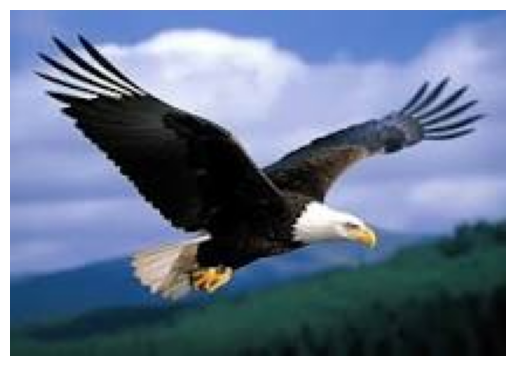

In [6]:
# Path to the image
img_path = 'eagle.jpg'

# Load and display the image
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


1/1 [==============================] - 0s 48ms/step


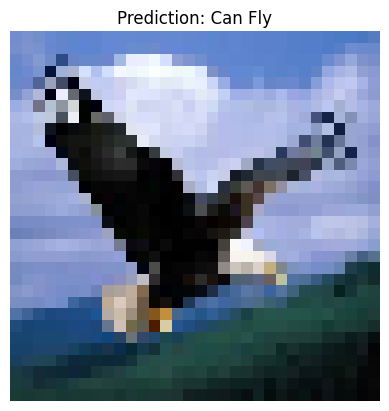

[[0.6369533]]


In [9]:
# Path to the image
img_path = 'eagle.jpg'

# Predict the given image
predict_image(img_path, model)

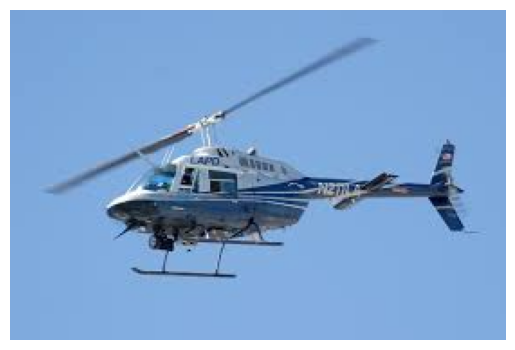

In [15]:
# Path to the image
img_path = 'heli.jpg'

# Load and display the image
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

1/1 [==============================] - 0s 45ms/step


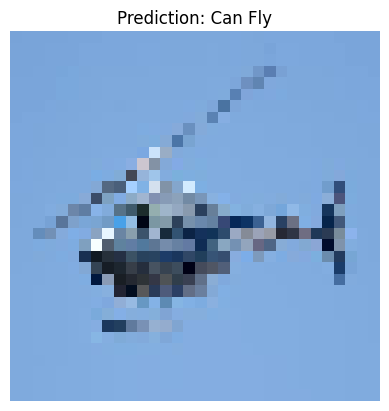

[[0.9960761]]


In [13]:
# Example usage

img_path = 'heli.jpg'
predict_image(img_path, model)

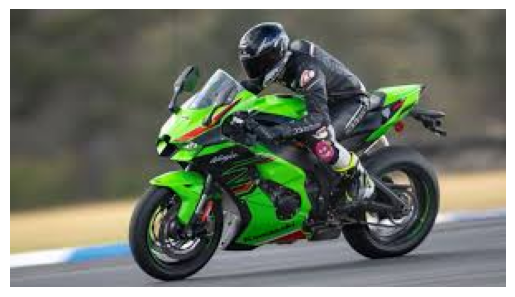

In [16]:
# Path to the image
img_path = 'bike.jpg'

# Load and display the image
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

1/1 [==============================] - 0s 36ms/step


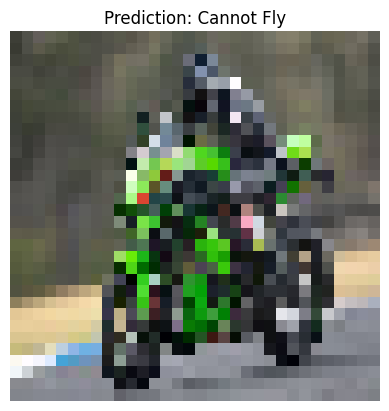

[[0.377569]]


In [14]:
img_path = 'bike.jpg'
predict_image(img_path, model)

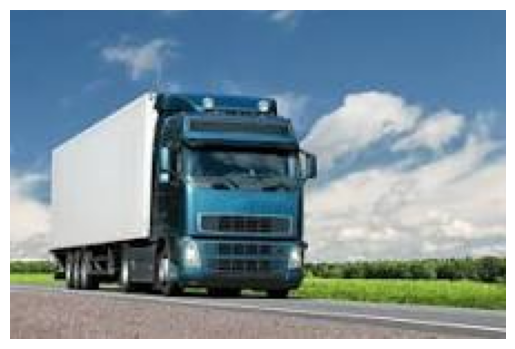

In [17]:
# Path to the image
img_path = 'truck.jpg'

# Load and display the image
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

1/1 [==============================] - 0s 28ms/step


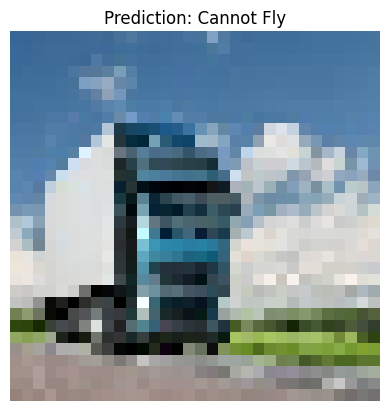

[[0.00581701]]


In [18]:
img_path = 'truck.jpg'
predict_image(img_path, model)